In [1]:
%matplotlib inline
from forschungspraktikum.jiles_atherton.functions import get_gradient, jiles_atherton_H, get_cost, JilesAthertonModel
from scipy.optimize import minimize
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import mu_0
import time

In [2]:
# Beispielparameter des Jiles-Atherton-Modells
alpha = 0.001
a = 110.5
k = 30.0
c = 0.4
Msat = 1.35e5

params = [alpha, a, Msat, k, c]

# Eingangsgrößen
r = 2.0e-2 # m, Radius
i_hat = 100.0 # A, Strom
f = 1000.0 # Hz, Frequenz
n = 3 # Anzahl Perioden
n_p = 512# Datenpunkte pro Periode


In [3]:
t = np.arange(n * n_p)/(n_p*f) # Zeitvektor
current = i_hat*np.cos(2*np.pi*f*t) # Stromvorgabe
H = current/(2*np.pi*r) # Resultierende Feldvorgabe

In [4]:
p_test = [alpha*2, a-50, Msat-1.0e5, k, c+0.5]

M_test = np.array(jiles_atherton_H(H, t, p_test)) + 10*np.random.normal(0.0, 100.0, int(t.size/2))

In [5]:
model = JilesAthertonModel(H, M_test, t)

def function_to_optimize(x):
    model.calculate(x)
    return model.get_cost(x)

def grad(x):
    return model.get_gradient(x)

def hess(x):
    return model.get_hessian(x)

def callback(x):
    pass#print(x)

t1 = time.time()
res = minimize(function_to_optimize, params, 
               method='TNC', options={'maxiter': 10000, 'disp': True}, 
               callback=callback,
               jac=grad,
               tol=1.0e-8,
               bounds = [(0, None), (0, None), (0, None), (0, None), (0, None)]
              )
t2 = time.time()
print(t2 - t1)

43.11465096473694


In [6]:
print(res)

     fun: 237409.3553886617
     jac: [-0.001661050066104508, 2.7849977279293878e-05, 2.1214689361644242e-07, -0.003925416691958006, 0.46862446399768665]
 message: 'Converged (|x_n-x_(n-1)| ~= 0)'
    nfev: 1063
     nit: 352
  status: 2
 success: True
       x: array([  2.46761645e-03,   6.59545873e+01,   3.52475810e+04,
         2.06880313e+01,   8.41997688e-01])


In [7]:
M = jiles_atherton_H(H, t, p_test)
M_ = jiles_atherton_H(H, t, res.x)
M_i = jiles_atherton_H(H, t, params)

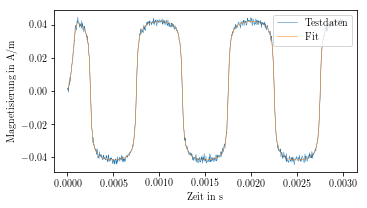

In [28]:
fig = plt.figure()
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
fig.set_size_inches(5.2, 3)
ax = fig.add_subplot(111)
ax.plot(t[::2], (np.array(M_test) + H[::2])*mu_0, label="Testdaten", linewidth=0.5)
ax.plot(t[::2], (np.array(M_) + H[::2])*mu_0, label="Fit", linewidth=.5)
ax.set_xlabel('Zeit in s')
ax.set_ylabel('Magnetisierung in A/m')
#plt.plot(t[::2], (np.array(M_i) + H[::2])*mu_0)
#plt.plot(t[::2], M_i)
plt.legend(loc=1)
plt.tight_layout()
plt.savefig('fit.pdf')

In [170]:
res_ = np.array(res.x)
p_test_ = np.array(p_test)
print(res_, p_test)
print(np.abs((1 - res_/p_test_)))

[  2.16437689e-03   6.24690901e+01   3.51076240e+04   2.72902493e+01
   9.16344872e-01] [0.002, 60.5, 35000.0, 30.0, 0.9]
[ 0.08218845  0.03254694  0.00307497  0.09032502  0.01816097]


In [ ]:
np.savetxt("test_data.txt", np.array([t[::2], 100.0*np.array(M)]).T)
np.savetxt("result.txt", np.array([t[::2], 100.0*np.array(M_)]).T)